In [1]:
# uploading the loan approval application process dataset.....................
import pandas as pd
loan_approval_data = pd.read_csv('loan_approval_dataset.csv')
loan_approval_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
# checking the tailend of the dataset...........
loan_approval_data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [3]:
# checking the dimensions of the dataset.................
loan_approval_data.shape

(4269, 13)

In [4]:
loan_approval_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# checking the data type of the variables of dataset "loan_approval_data"..............
loan_approval_data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
# checking if there is any null value exists in the dataset..................
loan_approval_data.isna().sum().sort_values(ascending=False)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# displaying the summary to have a better understanding about the dimenstion of the dataset............
loan_approval_data.describe().round(1)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2135.0,2.5,5059123.9,15133450.5,10.9,599.9,7472616.5,4973155.3,15126305.9,4976692.4
std,1232.5,1.7,2806839.8,9043363.0,5.7,172.4,6503636.6,4388966.1,9103753.7,3250185.3
min,1.0,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1068.0,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,2135.0,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,3202.0,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4269.0,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [8]:
# selecting the variables with numerical data type from the dataset "loan_approval_data"...............
num_var_loan = loan_approval_data.select_dtypes(include=['int64','float64'])
cat_var_load = loan_approval_data.select_dtypes(include=['object'])

In [9]:
# counting the number of unique values for each of the categorical column..................
unique_cat_count = cat_var_load.nunique()
unique_cat_count

education        2
self_employed    2
loan_status      2
dtype: int64

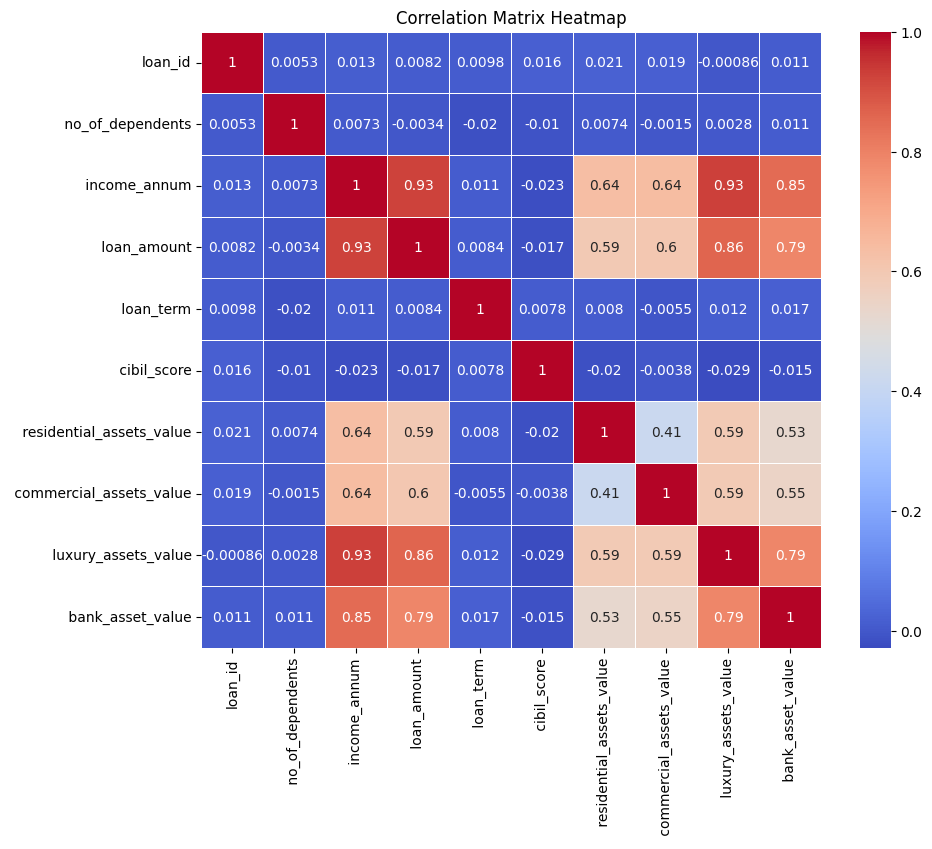

In [10]:
# checking the correlation between the variables of the dataset by creating the heatmap...........................
import matplotlib.pyplot as plt # type: ignore
import numpy as np
import pandas as pd
import seaborn as sns # type: ignore

# calculate the correlation matrix using the numerical variables of the dataset................
correlation_matrix = num_var_loan.corr() # type: ignore

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
# checking the outliers in the dataset by using the interquartile range (IQR) method...........

#calculate the Q1, Q3 and IQR for each numerical column.....................
stats = num_var_loan.describe(percentiles = [0.25, 0.75]) # type: ignore
Q1 = stats.loc['25%']
Q3 = stats.loc['75%']
IQR = Q3 - Q1

#check for outliers
outliers = (num_var_loan < (Q1 - 1.5 * IQR)) | (num_var_loan > (Q3 + 1.5 * IQR)) # type: ignore

#display the outliers for each numerical column
print("Outliers for each numerical column: ")
print(outliers.sum())


Outliers for each numerical column: 
loan_id                       0
 no_of_dependents             0
 income_annum                 0
 loan_amount                  0
 loan_term                    0
 cibil_score                  0
 residential_assets_value    52
 commercial_assets_value     37
 luxury_assets_value          0
 bank_asset_value             5
dtype: int64


In [12]:
num_var_loan.columns # type: ignore

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value',
       ' bank_asset_value'],
      dtype='object')

In [13]:
# addressing the outliers with median values......................
import numpy as np

# handle outliers using cap method.....................
loan_approval_data[num_var_loan.columns] = np.where(outliers, np.nan, loan_approval_data[num_var_loan.columns]) # type: ignore

# assign capped outliers with median values........................
for col in num_var_loan.columns:  # type: ignore
        median = loan_approval_data[col].median() # type: ignore
        loan_approval_data[col] = loan_approval_data[col].fillna(median) # type: ignore
        
# ensure outliers were handled...................
outliers_handled = ((loan_approval_data[num_var_loan.columns] < (Q1 - 1.5 * IQR)) | (loan_approval_data[num_var_loan.columns] > (Q3 + 1.5 * IQR))).sum() # type: ignore
print("Remaining outliers: ")
print(outliers_handled)

Remaining outliers: 
loan_id                      0
 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
dtype: int64


In [14]:
loan_approval_data # type: ignore

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5.0,Graduate,Yes,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,Rejected
4265,4266.0,0.0,Not Graduate,Yes,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,Approved
4266,4267.0,2.0,Not Graduate,No,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,Rejected
4267,4268.0,1.0,Not Graduate,No,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,Approved


In [15]:
# just duplicting the dataframe for further processing......................
loan_df = loan_approval_data # type: ignore
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,3700000.0,22700000.0,8000000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [16]:
# Standardize column names in training data
loan_df.columns = loan_df.columns.str.strip()

In [17]:
loan_df.dtypes

loan_id                     float64
no_of_dependents            float64
education                    object
self_employed                object
income_annum                float64
loan_amount                 float64
loan_term                   float64
cibil_score                 float64
residential_assets_value    float64
commercial_assets_value     float64
luxury_assets_value         float64
bank_asset_value            float64
loan_status                  object
dtype: object

In [18]:
# Remove 'loan_id' from the features before training the model
loan_df = loan_df.drop(columns=['loan_id'])

In [19]:
# trying 3 different models with the dataset.......................
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler # type: ignore
from sklearn.feature_selection import SelectKBest, f_classif # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score # type: ignore
import joblib 

# Preprocess the data
cat_loan_df = loan_df.select_dtypes(include=['object'])

# # Encode categorical variables
# encoders = {}
# for column in cat_loan_df.columns:
#     le = LabelEncoder()
#     loan_df[column] = le.fit_transform(loan_df[column])
#     #label_encoders[column] = le
#     joblib.dump(encoders, 'encoders.pkl')

# Encode categorical variables
encoders = {}
for column in cat_loan_df.columns:
    le = LabelEncoder()
    loan_df[column] = le.fit_transform(loan_df[column])
    encoders[column] = le
joblib.dump(encoders, 'encoders.pkl')


['encoders.pkl']

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

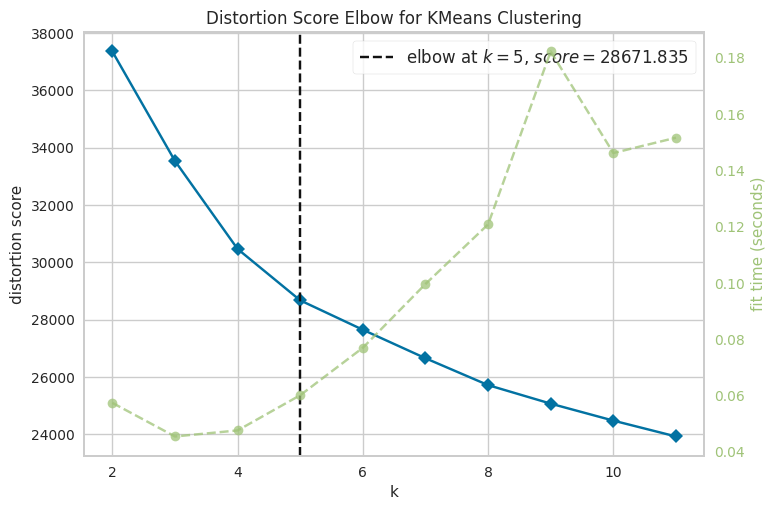

Optimal k: 5


In [20]:
# finding the best "k" value.....................
from sklearn.cluster import KMeans # type: ignore
from yellowbrick.cluster import KElbowVisualizer # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import warnings

# Standardize the data
scaler = StandardScaler()
scaled_loan_df = scaler.fit_transform(loan_df) # type: ignore

# Suppress the warnings
warnings.filterwarnings("ignore", category=UserWarning, module="yellowbrick")

# Set n_init explicitly to suppress the warning
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(scaled_loan_df)
visualizer.show()

# Print the optimal k
optimal_k = visualizer.elbow_value_
print(f'Optimal k: {optimal_k}')

In [21]:
# spliting the dataset "loan_df" between the input variables and target variable.............
y = loan_df.iloc[:,11] # type: ignore
X = loan_df.iloc[:,0:11] # type: ignore

In [22]:
# trying 3 different models with the dataset.......................
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler # type: ignore
from sklearn.feature_selection import SelectKBest, f_classif # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score # type: ignore
import joblib 

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

# apply SelectKBest to select the features.................
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)
joblib.dump(selector, 'selector.pkl')

# splitting the data into training and testing sets.................
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

lg_model = ''
dt_model = ''
sv_model = ''

# initializing the models......................
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# train and evaluate the models.......................
performance = []

for model_name, model in models.items():
    # cross-validation..............
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # train the model.........
    model.fit(X_train, y_train)
    
    # predicting on the test set.................
    y_pred = model.predict(X_test)

    if model_name == 'Logistic Regression':
        lg_model = model
    elif model_name == 'Decision Tree':
        dt_model = model
    else:
        sv_model = model
    
    # calculating the performance metrics...............
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance.append({
        'Model': model_name,
        'Cross-Validation Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy,
        'Mean Squared Error': mse,
        'R^2 Score': r2
    })

# Create a performance table
performance_df = pd.DataFrame(performance)

# Print the performance table
pd.DataFrame(performance_df)


,Model,Cross-Validation Accuracy,Test Accuracy,Mean Squared Error,R^2 Score
0,Logistic Regression,0.917530,0.910112,0.089888,0.612253
1,Decision Tree,0.949705,0.964419,0.035581,0.846517
2,Support Vector Machine,0.938772,0.936330,0.063670,0.725346


In [23]:
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

# Predicting the "Loan Status" by using the new data:

In [24]:
# using the new data to predict loan status by using the Decision Tree model..........
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler # type: ignore
from sklearn.feature_selection import SelectKBest, f_classif # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore

# new data for prediction.....................
new_data = pd.DataFrame({
    'no_of_dependents': [2, 2, 1],
    'education': ['Graduate', 'Graduate', 'Not Graduate'],
    'self_employed': ['No', 'No', 'Yes'],
    'income_annum': [9600000, 5000000, 7500000],
    'loan_amount': [29900000, 10000000, 15000000],
    'loan_term': [12, 15, 20],
    'cibil_score': [778, 700, 750],
    'residential_assets_value': [2400000, 6000000, 10000000],
    'commercial_assets_value': [17600000, 2000000, 3000000],
    'luxury_assets_value': [22700000, 8000000, 12000000],
    'bank_asset_value': [8000000, 3000000, 5000000]
})


In [25]:
new_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,Graduate,No,5000000,10000000,15,700,6000000,2000000,8000000,3000000
2,1,Not Graduate,Yes,7500000,15000000,20,750,10000000,3000000,12000000,5000000


In [26]:
from sklearn.preprocessing import LabelEncoder

# Load the saved encoders
encoders = joblib.load('encoders.pkl')

# Ensure categorical columns
cat_new_data = new_data.select_dtypes(include=['object'])
print(cat_new_data)

      education self_employed
0      Graduate            No
1      Graduate            No
2  Not Graduate           Yes


In [27]:
# Apply transformations using the cleaned encoders
for column in cat_new_data.columns:
    if column in encoders:
        # Transform the column using the saved encoder
        new_data[column] = encoders[column].fit_transform(new_data[column])
    else:
        print(f"No encoder found for column '{column}'. Skipping transformation.")

In [28]:
# Load the saved encoders
encoders = joblib.load('scaler.pkl')

scale_new_data = new_data.select_dtypes(include=int)
print(scale_new_data)


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 2          0              0       5000000     10000000   
2                 1          1              1       7500000     15000000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1         15          700                   6000000                  2000000   
2         20          750                  10000000                  3000000   

   luxury_assets_value  bank_asset_value  
0             22700000           8000000  
1              8000000           3000000  
2             12000000           5000000  


In [29]:
# Fit the scaler on the training data and transform the new data
new_data_scaled = scaler.fit_transform(scale_new_data)


In [30]:
# selecting the same top features in new data...........................
new_data_selected = selector.transform(new_data_scaled)

# predicting the loan status for new data using the Decision Tree model................
new_prediction = dt_model.predict(new_data_selected)

status = []
for i in new_prediction:
    if i == 1:
        status.append('Approved')
    else:
        status.append('Rejected')

result = pd.DataFrame({'loan_status': status})
result.set_index([pd.Index(['1', '2', '3'])])

,loan_status
1,Rejected
2,Approved
3,Rejected


In [31]:
# # Create feature template with correct structure
# template = loan_df.iloc[:, :-1].head(1)  # Exclude the target column
# template[:] = 0  # Fill with default values (e.g., zeros for numeric, default category for categorical)

# # Save the feature template
# template.to_csv('feature_template.csv', index=False)
